In [1]:
"""LiuKatrina_06.ipynb Harvard MCB 112 Problem Set 06: Student's game night submitted by Xiao (Katrina) Liu"""
__author__      = "Katrina Liu"
__email__ = "xliu@hms.harvard.edu"
__date__ = "Oct 14, 2022"

In [2]:
import numpy as np
from scipy import stats
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Code snippet from MCB112 pset6 writeup, source link: http://mcb112.org/w06/w06-homework.html
def probdist_beginner(X, sigma, mu_values):
    """ 
    Given an ndarray X_1..X_n, and a known sigma;
    and a list of the mu values in each column;
    return a list of the pub's inferred P(mu | X,sigma) for each column.
    """
    xbar = np.mean(X)
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= sigma / math.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

def probdist_advanced(X, mu_values):
    """ 
    Given an ndarray X_1..X_n,
    and a list of the mu values in each column;
    return a list of the pub's inferred P(mu | X) for each column.
    """
    xbar = np.mean(X)
    s    = np.std(X, ddof=1)     # note that numpy.std() by default calculates a population std dev; to get sample std. dev., set ddof=1
    N    = len(X)
    Pr   = [ stats.norm.pdf(x, loc=xbar, scale= s / math.sqrt(N)) for x in mu_values ]  # proportional to std error of the mean
    Z    = sum(Pr)                   # normalization constant
    Pr   = [ p / Z for p in Pr ]     # normalization to a discrete probability distribution
    return Pr

def probdist_t(X, mu_values):
    """ 
    Given an ndarray X_1..X_n,
    and a list of the mu values in each column;
    return a list of the inferred P(mu | X) for each column,
    according to Student's t distribution with N-1 degrees of freedom.
    """
    N    = len(X)
    xbar = np.mean(X)
    s    = np.std(X, ddof=1)
    t    = [ (xbar - mu) / (s / np.sqrt(N)) for mu in mu_values ]    # t statistic, given sample mean, sample stddev, and N
#   t    = [ stats.ttest_1samp(X, mu)[0] for mu in mu_values ]       # ... (equivalently, python can calculate t statistic for you)
    Pr   = [ stats.t.pdf(val, N-1) for val in t ]
    Z    = sum(Pr)
    Pr   = [ p / Z for p in Pr ]    
    return Pr

# Exercise 1: the beginner's game

For the beginner's game, our goal is to calculate the posterior probability $P(\mu|x_1,x_2,...x_n,\sigma)$. Denote $X = (x_1,x_2,...,x_n)$. By Bayes rule, we can rewrite the posterior probability as $$P(\mu|X,\sigma) = \dfrac{P(X|\mu,\sigma)P(\mu|\sigma)}{P(X|\sigma)}$$
By the independence of $\mu$ and $\sigma$, the posterior is $$P(\mu|X,\sigma) = \dfrac{P(X|\mu,\sigma)P(\mu)}{\sum_{\mu'}P(X|\mu',\sigma)P(\mu')}$$. Since $\mu$ is uniformly distributed, $P(\mu) = P(\mu')$ for all possible $\mu'$. Therefore, the final posterior representation is $$P(\mu|X,\sigma) = \dfrac{P(X|\mu,\sigma)}{\sum_{\mu'}P(X|\mu',\sigma)}$$

In [4]:
# Setting up the board parameterss
MUS = [10*i for i in range(-10,11)]
SIGMAS = [5*i for i in range(1,21)]

# Provided case from the writeup
X_test = np.array([ 11.50, -2.32, 9.18])
sigma_test = 60
mu_test = 20

In [5]:
def beginner_posterior(X,sigma, mus):
   """
   Calculate the bayesian posterior probability P(mu|X,sigma)
   :param X: a list of sample values
   :param sigma: true provided sigma
   :param mus: a list of mean values
   :return: a list of posterior probabilities based on each mean value
   """
   prior_prob = np.ones(len(mus))
   for i in range(len(mus)):
      prior_prob[i] = np.prod([stats.norm.pdf(x,mus[i],sigma) for x in X])
   return prior_prob/np.sum(prior_prob)

In [6]:
def plot_semilog_prob(prob,true_mu, pub_prob=None,t_prob=None,mus=MUS):
    """
    Plotting the semilog probability versus mean values
    :param prob: a list of posterior probabilities of each mean values
    :param true_mu: true mean value
    :param pub_prob: a list of probabilities of each mean values
    :param t_prob: a list of t distribution probabilities of each mean values
    :param mus: a list of mean values
    """
    plt.figure()
    plt.semilogy(mus, prob,label="Bayesian")
    if pub_prob is not None:
        plt.semilogy(mus,pub_prob, label="Pub")
    if t_prob is not None:
        plt.semilogy(mus,t_prob, label="T-distribution")
    plt.axvline(true_mu,ls="--",label="True mean=%d"%true_mu)
    plt.legend()
    plt.ylabel("Log Posterior Probability")
    plt.xlabel("Mean Value")
    plt.show()

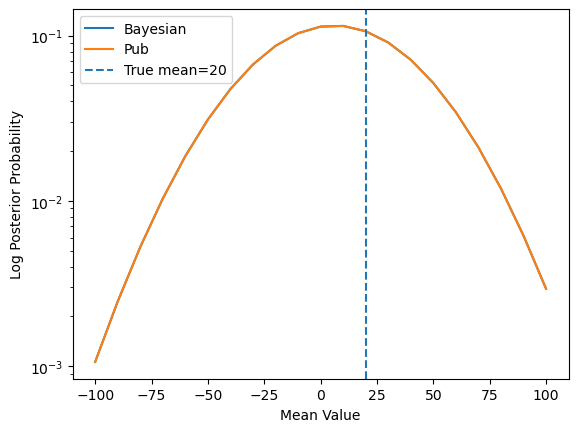

In [7]:
# Plot the semilog posterior probabilities of the given case 
prob_test = beginner_posterior(X_test, sigma_test, MUS)
pub_test = probdist_beginner(X_test,sigma_test,MUS)
plot_semilog_prob(prob_test,mu_test,pub_test)

## Additional Analysis
From the figure above, it appears that the bayesian inference produces identical probability to the probability produced by the pub. To verify this, we will create additional tests by running the student-game.py script with different input number of samples between 3-6 and plot out the results. Because of the randomness of how the game is generating the samples, we record the run results and use them as test cases.

### Test 1
Command run:\
`!python student-game.py 3`\
Results:
```text
Welcome to Student's game night...

The RNG seed is 4443

The hidden grid has 20 rows for sigma 100.0..5.0,
                and 21 cols for mu -100.0..100.0.

Student picked grid col = 14, row = 13
and thus mu = 40.0, sigma = 35.0

Student's tea distribution machine shows the customers 3 samples:
     80.34
     76.58
    -38.31

which give sample mean:    39.54
   and sample std.dev.:    67.44
Figure(640x480)
```
### Test 2
Command run:\
`!python student-game.py 4`\
Results:
```text
Welcome to Student's game night...

The RNG seed is 9955

The hidden grid has 20 rows for sigma 100.0..5.0,
                and 21 cols for mu -100.0..100.0.

Student picked grid col = 19, row = 14
and thus mu = 90.0, sigma = 30.0

Student's tea distribution machine shows the customers 4 samples:
     78.02
     78.29
     20.50
     72.59

which give sample mean:    62.35
   and sample std.dev.:    28.02
Figure(640x480)
```
### Test 3
Command run:\
`!python student-game.py 5`\
Results:
```text
Welcome to Student's game night...

The RNG seed is 3969

The hidden grid has 20 rows for sigma 100.0..5.0,
                and 21 cols for mu -100.0..100.0.

Student picked grid col = 16, row = 4
and thus mu = 60.0, sigma = 80.0

Student's tea distribution machine shows the customers 5 samples:
    117.21
    117.25
    148.01
    201.82
     -0.79

which give sample mean:   116.70
   and sample std.dev.:    74.21
Figure(640x480)
```
### Test 4
Command run:\
`!python student-game.py 6`\
Results:
```text
Welcome to Student's game night...

The RNG seed is 4457

The hidden grid has 20 rows for sigma 100.0..5.0,
                and 21 cols for mu -100.0..100.0.

Student picked grid col = 2, row = 3
and thus mu = -80.0, sigma = 85.0

Student's tea distribution machine shows the customers 6 samples:
    -28.41
    -79.88
    -63.03
   -144.62
    -56.80
     31.45

which give sample mean:   -56.88
   and sample std.dev.:    58.10
Figure(640x480)
```

In [8]:
# Store the game results in variables
X_test_1 = [80.34,76.58,-38.31]
mu_test_1 = 40
sigma_test_1 = 35

X_test_2 = [78.02,78.29,20.50,72.59]
mu_test_2 = 90
sigma_test_2 = 30

X_test_3 = [ 117.21, 117.25, 148.01,201.82,-0.79]
mu_test_3 = 60
sigma_test_3 = 80

X_test_4 = [-28.41,-79.88,-63.03,-144.62,-56.80,31.45]
mu_test_4 = -80
sigma_test_4 = 85

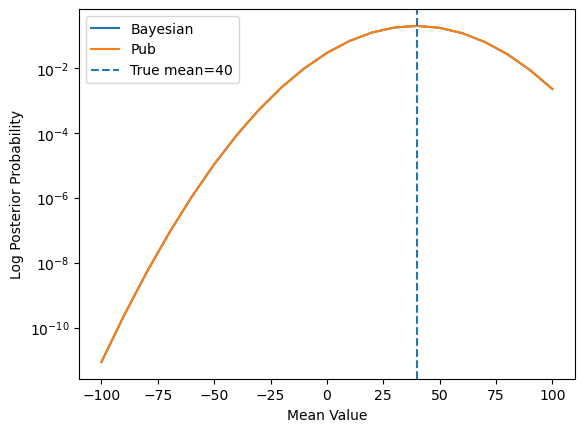

In [9]:
# Plot posterior probabilities for test 1
prob_test_1 = beginner_posterior(X_test_1,sigma_test_1,MUS)
pub_test_1 = probdist_beginner(X_test_1,sigma_test_1,MUS)
plot_semilog_prob(prob_test_1,mu_test_1, pub_test_1)

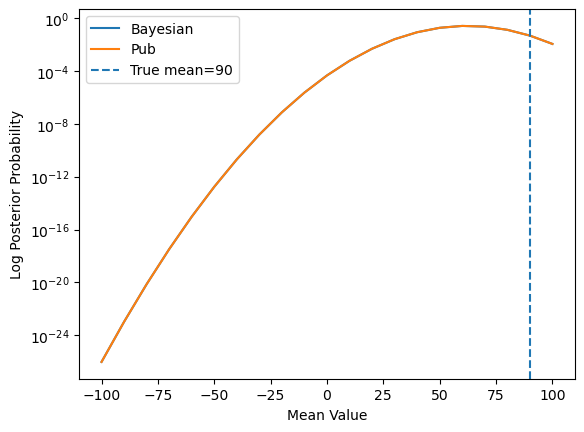

In [10]:
# Plot posterior probabilities for test 2
prob_test_2 = beginner_posterior(X_test_2,sigma_test_2,MUS)
pub_test_2 = probdist_beginner(X_test_2,sigma_test_2,MUS)
plot_semilog_prob(prob_test_2,mu_test_2, pub_test_2)

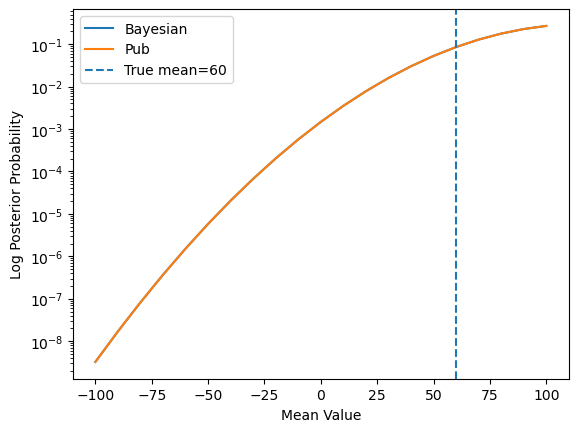

In [11]:
# Plot posterior probabilities for test 3
prob_test_3 = beginner_posterior(X_test_3,sigma_test_3,MUS)
pub_test_3 = probdist_beginner(X_test_3,sigma_test_3,MUS)
plot_semilog_prob(prob_test_3,mu_test_3, pub_test_3)

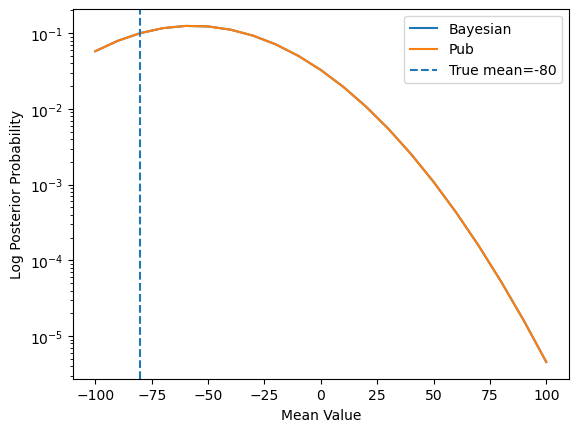

In [12]:
# Plot posterior probabilities for test 4
prob_test_4 = beginner_posterior(X_test_4,sigma_test_4,MUS)
pub_test_4 = probdist_beginner(X_test_4,sigma_test_4,MUS)
plot_semilog_prob(prob_test_4,mu_test_4, pub_test_4)

From these plots, we can most definitely say that for beginner's game, the pub calculates correct probabilities.

# Exercise 2: the advanced game
Similarly to what we have done in exercise 1, we first rewrite the posterior probability based on Bayes rule:
$$P(\mu,\sigma|X) = \dfrac{P(X|\mu, \sigma)P(\mu,\sigma)}{P(X)} = \dfrac{P(X|\mu, \sigma)P(\mu,\sigma)}{\sum_{\mu'.\sigma'}P(X|\mu',\sigma')P(\mu',\sigma')} = \dfrac{P(X|\mu, \sigma)}{\sum_{\mu'.\sigma'}P(X|\mu',\sigma')}$$

In [13]:
def advanced_posterior(X,mus,sigmas):
    """
    Calculate the bayesian posterior probabilities of each mean value and variance
    :param X: a list of sample values
    :param mus: a list of mean values
    :param sigmas: a list of variance values
    :return: a 2d-array of posterior probabilities correspond to each pair of sigma and mu
    """
    prior_probs = np.ones((len(sigmas), len(mus)))
    for i in range(len(sigmas)):
        for j in range(len(mus)):
            prior_probs[i,j] = np.prod([stats.norm.pdf(x,mus[j],sigmas[i]) for x in X])
    return prior_probs/np.sum(prior_probs)

def marginalized_mean_posterior(posterior_probs):
    """
    Calculate the marginalized posterior probability for each mean value
    :param posterior_probs: a 2d-array of posterior probabilities correspond to 
                            each pair of sigma and mu
    :return: a list of marginalized probability for each mean value
    """
    return np.sum(posterior_probs,axis=0)

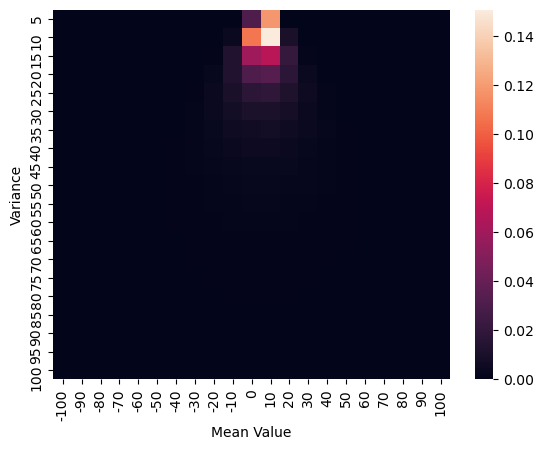

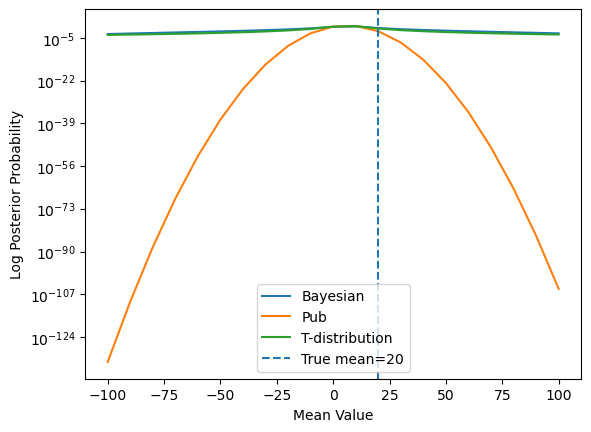

In [14]:
# Plot the heat map and the semilog probability figure for the given case
res = advanced_posterior(X_test,MUS,SIGMAS)
pub_res = probdist_advanced(X_test,MUS)
t_res = probdist_t(X_test,MUS)
margin_res = marginalized_mean_posterior(res)
sns.heatmap(res,xticklabels=MUS, yticklabels=SIGMAS)
plt.xlabel("Mean Value")
plt.ylabel("Variance")
plt.show()
plot_semilog_prob(margin_res,mu_test,pub_res,t_res)

## Additional Analysis
By looking the heat map, we can see that the variances with high posterior probilities are significantly smaller than the true variance. From the semilog plot of marginalized posterior probabilities, we can see that for there's significant differences. However, the bayesian posterThe pub's probilities are much lower than the marginal probabilities for the non true means. We will verify this hypothesis by plotting for the previously generated tests.

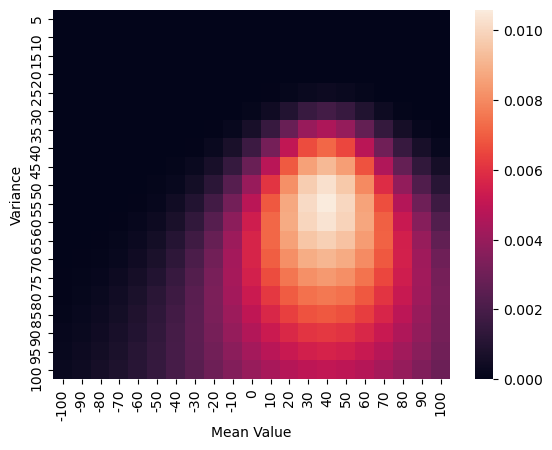

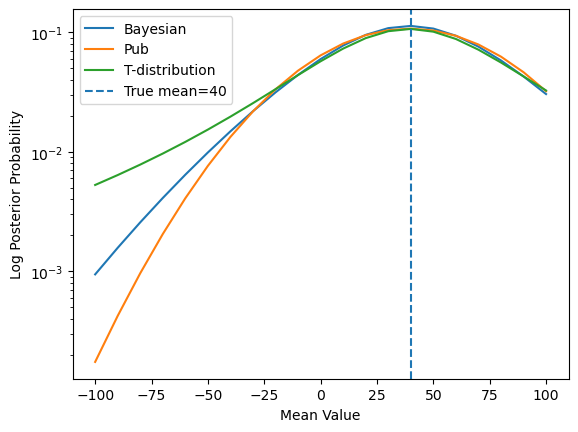

In [15]:
# Plot the heat map and the semilog probability figure for the test case 1
res_test_1 = advanced_posterior(X_test_1,MUS,SIGMAS)
pub_res_test_1 = probdist_advanced(X_test_1,MUS)
t_res_1 = probdist_t(X_test_1,MUS)
margin_res_test_1 = marginalized_mean_posterior(res_test_1)
sns.heatmap(res_test_1,xticklabels=MUS, yticklabels=SIGMAS)
plt.xlabel("Mean Value")
plt.ylabel("Variance")
plt.show()
plot_semilog_prob(margin_res_test_1,mu_test_1,pub_res_test_1,t_res_1)

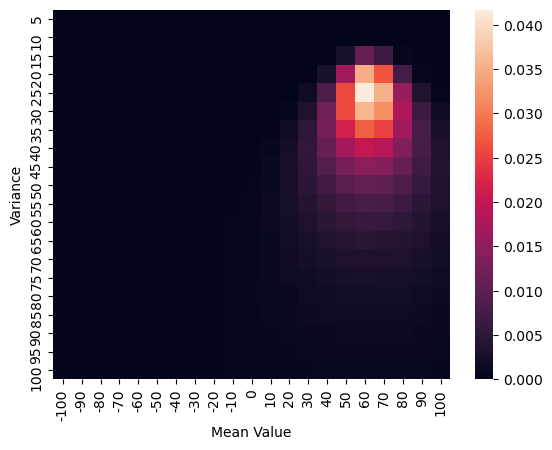

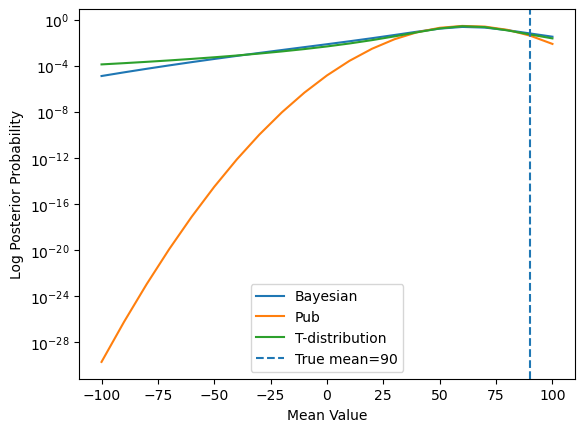

In [16]:
# Plot the heat map and the semilog probability figure for the test case 2
res_test_2 = advanced_posterior(X_test_2,MUS,SIGMAS)
pub_res_test_2 = probdist_advanced(X_test_2,MUS)
t_res_2 = probdist_t(X_test_2,MUS)
margin_res_test_2 = marginalized_mean_posterior(res_test_2)
sns.heatmap(res_test_2,xticklabels=MUS, yticklabels=SIGMAS)
plt.xlabel("Mean Value")
plt.ylabel("Variance")
plt.show()
plot_semilog_prob(margin_res_test_2,mu_test_2,pub_res_test_2,t_res_2)

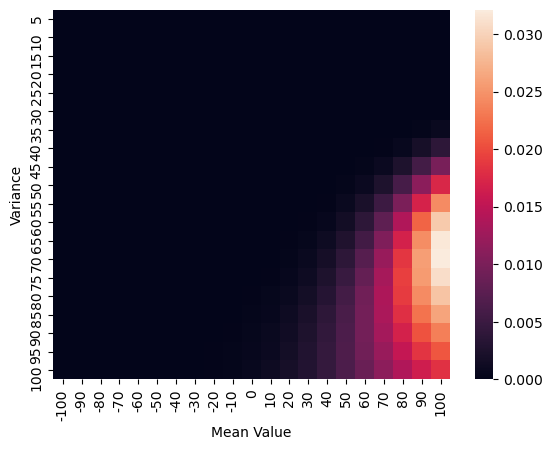

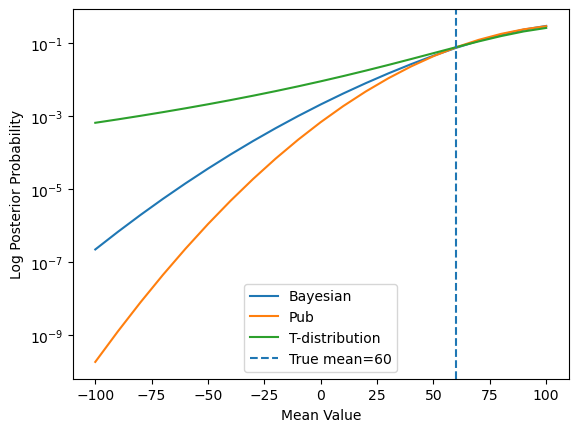

In [17]:
# Plot the heat map and the semilog probability figure for the test case 3
res_test_3 = advanced_posterior(X_test_3,MUS,SIGMAS)
pub_res_test_3 = probdist_advanced(X_test_3,MUS)
t_res_3 = probdist_t(X_test_3,MUS)
margin_res_test_3 = marginalized_mean_posterior(res_test_3)
sns.heatmap(res_test_3,xticklabels=MUS, yticklabels=SIGMAS)
plt.xlabel("Mean Value")
plt.ylabel("Variance")
plt.show()
plot_semilog_prob(margin_res_test_3,mu_test_3,pub_res_test_3,t_res_3)

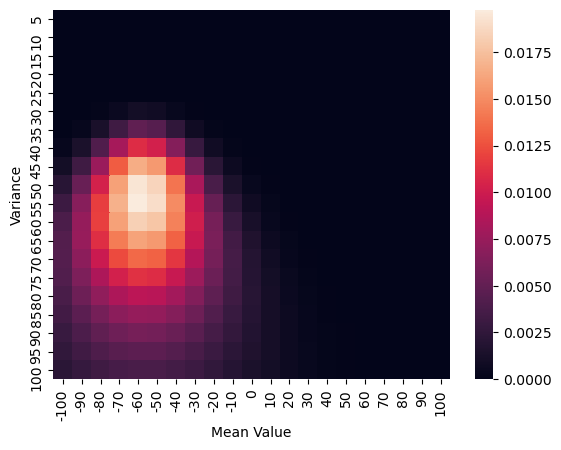

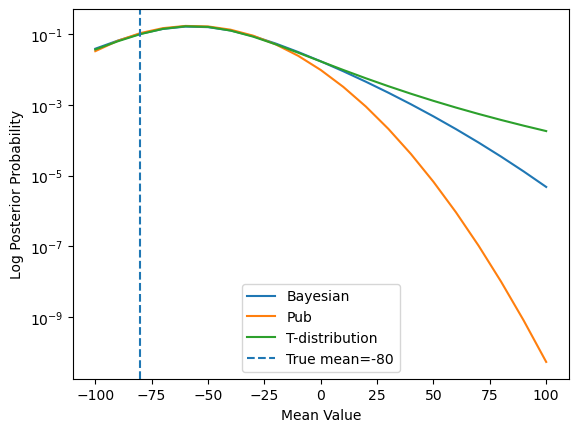

In [18]:
# Plot the heat map and the semilog probability figure for the test case 4
res_test_4 = advanced_posterior(X_test_4,MUS,SIGMAS)
pub_res_test_4 = probdist_advanced(X_test_4,MUS)
t_res_4 = probdist_t(X_test_4,MUS)
margin_res_test_4 = marginalized_mean_posterior(res_test_4)
sns.heatmap(res_test_4,xticklabels=MUS, yticklabels=SIGMAS)
plt.xlabel("Mean Value")
plt.ylabel("Variance")
plt.show()
plot_semilog_prob(margin_res_test_4,mu_test_4,pub_res_test_4,t_res_4)

We can see that, the probabilities we calculated according to Bayes rule more closely aligned to the actual T distribution, whereas the probability calculateed by the pub differs greatly from the t distribution.

# Exercise 3: where's the advantage?
According to our above analysis, there appears to be a significant differences between the pub's induced $P(\mu|X)$ probability and marginal probabiltiy calculated by Bayes rule or the actual t-distribution the pub should be using to generate samples. Therefore, the pub is not generating the odds correctly. We noticed that, for the true mean, the pub's probability is close to the Bayesian marginalized posterior probability. However, for all the non-true mean value, the pub's probability is much lower than the Bayesian marginalized posterior probability. This provides an advantage for the players in the game, which is the fact that since the probability of generating every other mean is much smaller, which implies the betting odds would be biased. If the pub's calculated odds is lower than the actual odds, the pub would think it is less likely to happen and put more money than fair on the bet. Say we have true probability $p_1$ and pub's probability $p_2$ for value $\mu$ as mean. With fair bet, if we place 1 dollar, if we win, we would win $1/p_1$ dollars to ensure the expected win amount to be zero (which makes it a fair bet). However, with the pub's probability, the actual amount of money we win with one dollar is $1/p_2$. Therefore, in this case, the expected amount of money we win with one dollar would be $$E[\text{money win}] = \frac{p_1}{p_2}$$. If we enter the game with 0 dollar, the expected amount of money we have would be $$E[\text{money}] = \frac{p_1}{p_2}-1$$ Our strategy to maximize the win would be to calculate this value for each $\mu$ and pick the one that results in the highest expected money we have. Plotting this for the above example, we will have: 

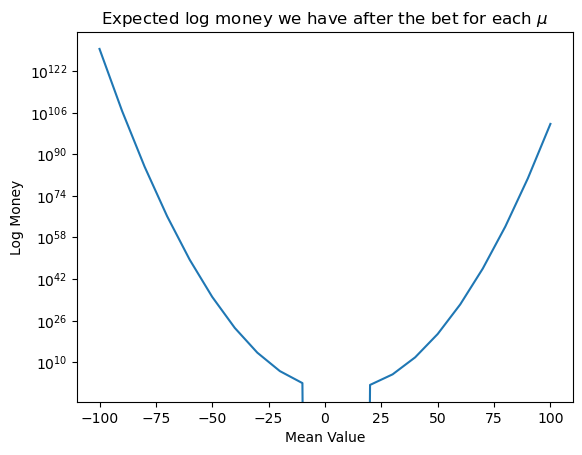

In [21]:
# Plot expected money
plt.figure()
plt.semilogy(MUS,margin_res/pub_res-1)
plt.title("Expected log money we have after the bet for each $\mu$")
plt.xlabel("Mean Value")
plt.ylabel("Log Money")
plt.show()

Therefore, our strategy will be to pick -100 as it will give us the maximum expected money.